In [1]:
from importlib import reload
from utils import *

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
w2v = load_w2v()

Loading real w2v...
Done


Loading tokenizer...
Loading stemmer...
Loading dataset...
Running SVM...
{'mean_fit_time': array([ 5.70214685,  5.94102859,  5.83350285,  5.83887831,  5.87980127,
        5.89571595,  5.9181668 ,  5.91827957,  5.900527  ,  5.90566985,
        5.87075877,  5.84899958,  5.85151458,  5.81923866,  5.88456837,
        5.80594508,  5.79420837,  5.755922  ,  5.76574596,  5.69544053]),
 'mean_score_time': array([ 0.61039241,  0.64591487,  0.59570845,  0.6070509 ,  0.60888108,
        0.62142491,  0.59905052,  0.59654514,  0.58987832,  0.60387834,
        0.59782084,  0.58769997,  0.59353813,  0.59804948,  0.60438355,
        0.58052953,  0.60204268,  0.58137663,  0.58253948,  0.56719971]),
 'mean_test_score': array([ 0.71698414,  0.71632626,  0.71681195,  0.71916374,  0.71920499,
        0.71902671,  0.71789897,  0.72033598,  0.72169945,  0.72160551,
        0.72274537,  0.72416964,  0.72410644,  0.72373769,  0.7213053 ,
        0.72567542,  0.72366576,  0.7247444 ,  0.72541934,  0.72519873])

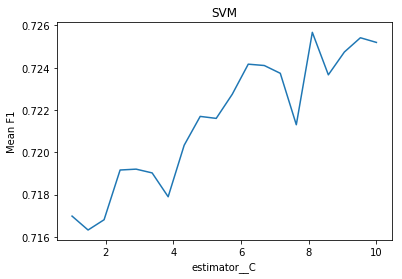

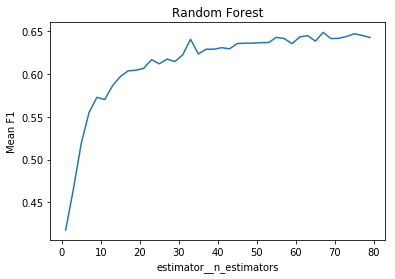

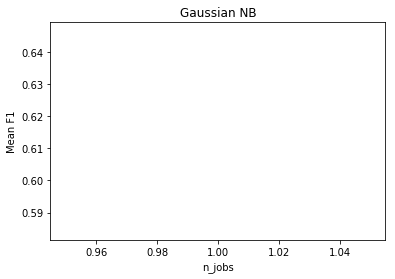

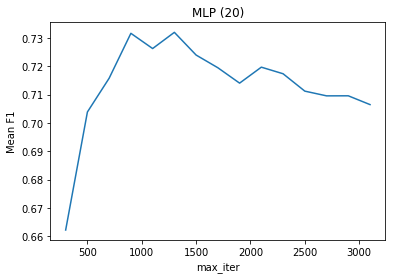

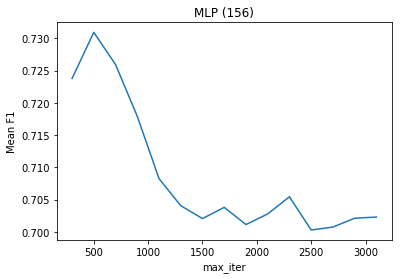

In [3]:
import acd
reload(acd)
acd_ = acd.ACD(w2v)
acd_.grid_search_acd()

In [7]:
%matplotlib
from matplotlib import pyplot as plt
plt.show()

Using matplotlib backend: TkAgg


In [4]:
sent = 'Screen looks awesome; but battery is bad'
acd.predict_ote(sent)

AttributeError: module 'acd' has no attribute 'predict_ote'

In [ ]:
tokens = acd.tokenizer.tokenize(sent)
acd.predict_many(tokens)

In [ ]:
acd.predict('Excellent product')